In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy.interpolate import interp1d 
import fitsio
import sys
import scipy
#sys.path.append('../cosmolike_planck_working/')

%load_ext autoreload
%autoreload 2

HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)

In [ ]:
../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/

In [ ]:
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_gold_st82_nbins10_jk100.txt', unpack=True)
meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_poisson_dmass_no_weight_pcut01_nbins10_jk100.txt', unpack=True)
meanr2, xi2, xi_err2 = np.loadtxt(rootdir+'/act//acf_auto_dmass_veto_pcut01_nbins10_jk100.txt', unpack=True)
meanr3, xi3, xi_err3 = np.loadtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True)
meanr4, xi4, xi_err4 = np.loadtxt(rootdir+'/act//acf_auto_dmass_no_weight_pcut01_nbins10_jk100.txt', unpack=True)




In [427]:
DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]



cov_cmass_n = np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_dmass = np.genfromtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.cov')


#HFn = HF(100, 10)
#HFs = HF(100, 10)
#HFd = HF(100, 10)

#print HFn

#F_ns = HFn * HFs * np.linalg.inv(cov_cmass_n + cov_cmass_s)
#F_nd = HFn * HFd * np.linalg.inv(cov_cmass_n + cov_dmass)
#F_sd = HFs * HFd * np.linalg.inv(cov_cmass_s + cov_dmass)

0.888888888889


In [101]:
cmass_spec = fitsio.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz')
zbins = np.linspace(0.0, 4.0, 401)
Nz_cmass,_ = np.histogram( cmass_spec['Z'], bins= zbins, normed=True)

In [102]:
DAT = np.column_stack((zbins[:-1], Nz_cmass))
np.savetxt('/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/cmass_ngc.nz_2',DAT)

In [94]:
data_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/'
cosmosis_wtheta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/bin_1_1.txt')
cosmosis_theta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/theta.txt')* 57.2958

cosmosis_wtheta02 = np.genfromtxt(data_dir+'output/wgtheta_z0.2/galaxy_xi/bin_1_1.txt')
cosmosis_wthetam02 = np.genfromtxt(data_dir+'output/wgtheta_zm0.2/galaxy_xi/bin_1_1.txt')
#cosmosis_theta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/theta.txt')* 57.2958

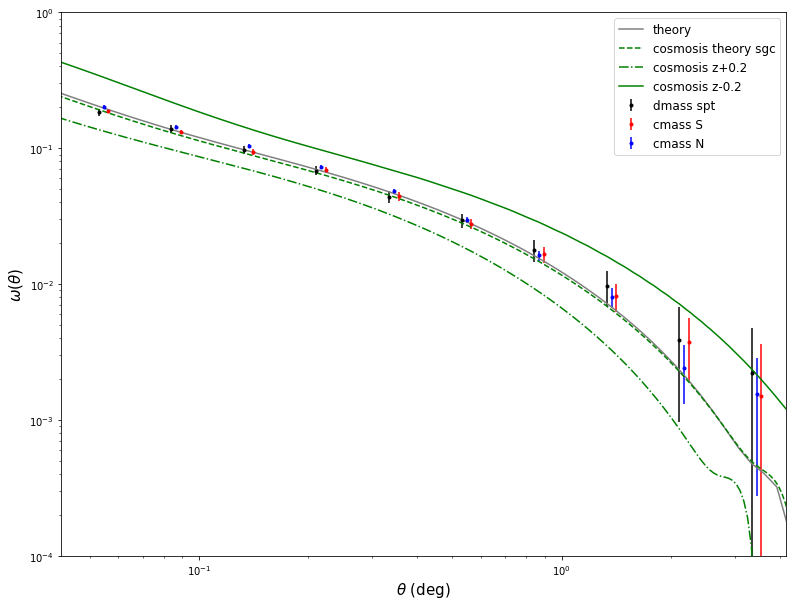

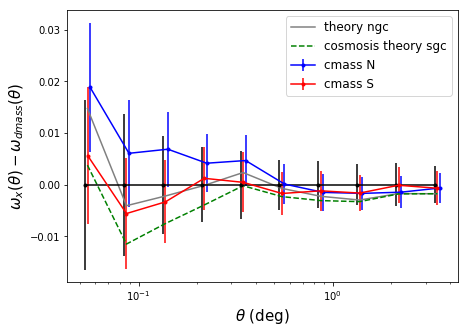

In [99]:

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)


theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)
cosmosis_interp = scipy.interpolate.interp1d(cosmosis_theta, cosmosis_wtheta)
cosmosis_interp = cosmosis_interp( meanr )
nzs_ratio = theory_sgc_interp/theory_interp

fig, ax = plt.subplots(figsize = (13, 10))

ax.errorbar(meanr*0.97, xi, yerr = xi_err, fmt = '.', color='k', label='dmass spt')
ax.errorbar(meanr7*1.03, xi7, yerr =xi_err7, fmt = '.r', label='cmass S')
ax.errorbar(meanr11*1.0, xi11, yerr = xi_err11, fmt = '.b', label='cmass N')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
#ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
ax.plot(cosmosis_theta, cosmosis_wtheta, '--', color='green', label='cosmosis theory sgc')
ax.plot(cosmosis_theta, cosmosis_wtheta02, '-.', color='green', label='cosmosis z+0.2')
ax.plot(cosmosis_theta, cosmosis_wthetam02, '-', color='green', label='cosmosis z-0.2')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)


#fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



fig, ax = plt.subplots(figsize = (7, 5))

ax.errorbar(meanr*0.97, xi-xi, yerr = np.sqrt(2)*xi_err, fmt = '.-', color='k')
ax.errorbar(meanr11*1.03, xi11-xi, yerr = np.sqrt(xi_err11**2+xi_err**2), fmt = '.-b', label='cmass N')
ax.errorbar(meanr7*1.0, xi7-xi, yerr = np.sqrt(xi_err7**2+xi_err**2), fmt = '.-r', label='cmass S')

ax.plot(meanr, theory_interp -xi, '-', color='grey',label='theory ngc' )
#ax.plot(meanr, theory_sgc_interp -xi, '--', color='grey', label='theory sgc' )
ax.plot(meanr, cosmosis_interp -xi, '--', color='green', label='cosmosis theory sgc' )

vdiff = xi - xi7
chisqr = np.dot(np.dot( vdiff, F_ns), vdiff)#/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega_x(\theta)- \omega_{dmass}(\theta)$', fontsize = 15)





In [455]:
fitsname = '/n/des/lee.5922/programs/cosmolike/des-mpp/cosmosis/extensions/systematics/1neutrino/2pt_sim_1110_1neutrino_baseline.fits'
ffits = fitsio.FITS(fitsname)

In [ ]:
#DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.txt')

#DAT7 = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt')

#DAT11 = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt')

In [3]:
cov_cmass_n = np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_dmass = np.genfromtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.cov')
cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))

In [511]:
#theta, corrdata, correrr = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt', unpack=True)

root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/'

nzdist_filename = root_dir + 'dmass_cat/cmass_ngc.nz_2'
output_fitsname = root_dir +'dmass_cat/cov/cmass_cov_DS_dv_realD.fits'
twopt_dat = '../data_txt/acf_auto_dmass_spt_nbins10_jk100'
cov_filename = twopt_dat+'.cov'
twopt_filename = twopt_dat+'.txt'

theta, corrdata, correrr = np.loadtxt(twopt_filename, unpack=True)
theta = 60 * theta
cov = cov_dmass + cov_cmass_s #np.genfromtxt(cov_filename)

In [512]:
from astropy.io import fits
hdulist = fits.open(fitsname, mode='update')

In [513]:
cov_empty = np.zeros((40,40))
np.fill_diagonal(cov_empty, 1)
cov_empty[-10:, -10:] = cov[:,:]

hdulist[1].data = cov_empty[:,:]

chdr = hdulist[1].header
chdr.set("NAME_0", "xip")
chdr.set("STRT_0", 0)
chdr.set("NAME_1", "xim")
chdr.set("STRT_1", 10)
chdr.set("NAME_2", "gammat")
chdr.set("STRT_2", 20)
chdr.set("NAME_3", "wtheta")
chdr.set("STRT_3", 30)

In [514]:
ntheta = len(theta)
ggl_bin1 = np.ones(ntheta)
ggl_bin2 = np.ones(ntheta)
ggl_angbin = np.arange(1, ntheta+1, 1)
#ggl_value = corrdata[:ntheta].copy()
#ggl_ang = theta[:ntheta].copy()
ggl_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
ggl_ang =  theta[:ntheta].copy()

ggl_col1 = fits.Column(name='BIN1', format='i8', array=ggl_bin1)
ggl_col2 = fits.Column(name='BIN2', format='i8', array=ggl_bin2)
ggl_col3 = fits.Column(name='ANGBIN', format='i8', array=ggl_angbin)
ggl_col4 = fits.Column(name='VALUE', format='f8', array=ggl_value)
ggl_col5 = fits.Column(name='ANG', format='f8', array=ggl_ang)

ggl_cols = fits.ColDefs([ggl_col1, ggl_col2, ggl_col3, ggl_col4, ggl_col5])
ggl_tbhdu = fits.BinTableHDU.from_columns(ggl_cols)

In [515]:
hdulist[2] = ggl_tbhdu
hdulist[2].name = 'xip'

xip_hdr = hdulist[2].header
xip_hdr.set("2PTDATA", True)
xip_hdr.set("EXTNAME", "xip")
xip_hdr.set("QUANT1", "G+R")
xip_hdr.set("QUANT2", "G+R")
xip_hdr.set("KERNEL_1", "nz_source")
xip_hdr.set("KERNEL_2", "nz_source")
xip_hdr.set("WINDOWS", "SAMPLE")
xip_hdr.set("TUNIT5", "arcmin")
xip_hdr.set("N_ZBIN_1", 1)
xip_hdr.set("N_ZBIN_2", 1)
xip_hdr.set("N_ANG", 10)

In [516]:
ntheta = len(theta)
xim_bin1 = np.ones(ntheta)
xim_bin2 = np.ones(ntheta)
xim_angbin = np.arange(1, ntheta+1, 1)
xim_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
xim_ang =  theta[:ntheta].copy()

xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)

hdulist[3] = xim_tbhdu
hdulist[3].name = 'xim'

xim_hdr = hdulist[3].header
xim_hdr.set("2PTDATA", True)
xim_hdr.set("EXTNAME", "xim")
xim_hdr.set("QUANT1", "G-R")
xim_hdr.set("QUANT2", "G-R")
xim_hdr.set("KERNEL_1", "nz_source")
xim_hdr.set("KERNEL_2", "nz_source")
xim_hdr.set("WINDOWS", "SAMPLE")
xim_hdr.set("TUNIT5", "arcmin")
xim_hdr.set("N_ZBIN_1", 1)
xim_hdr.set("N_ZBIN_2", 1)
xim_hdr.set("N_ANG", 10)


In [517]:
ntheta = len(theta)
xim_bin1 = np.ones(ntheta)
xim_bin2 = np.ones(ntheta)
xim_angbin = np.arange(1, ntheta+1, 1)
xim_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
xim_ang =  theta[:ntheta].copy()

xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)

hdulist[4] = xim_tbhdu
hdulist[4].name = 'gammat'

ggl_hdr = hdulist[4].header
ggl_hdr.set("2PTDATA", True)
ggl_hdr.set("EXTNAME", "gammat")
ggl_hdr.set("QUANT1", "GPR")
ggl_hdr.set("QUANT2", "G+R")
ggl_hdr.set("KERNEL_1", "nz_lens")
ggl_hdr.set("KERNEL_2", "nz_source")
ggl_hdr.set("WINDOWS", "SAMPLE")
ggl_hdr.set("TUNIT5", "arcmin")
ggl_hdr.set("N_ZBIN_1", 1)
ggl_hdr.set("N_ZBIN_2", 1)
ggl_hdr.set("N_ANG", 10)

In [518]:
ntheta = len(theta)
xim_bin1 = np.ones(ntheta)
xim_bin2 = np.ones(ntheta)
xim_angbin = np.arange(1, ntheta+1, 1)
xim_value =  corrdata[:ntheta].copy()
xim_ang =  theta[:ntheta].copy()

xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)


hdulist[5] = xim_tbhdu
hdulist[5].name = 'wtheta'

ggl_hdr = hdulist[5].header
ggl_hdr.set("2PTDATA", True)
ggl_hdr.set("EXTNAME", "wtheta")
ggl_hdr.set("QUANT1", "GPR")
ggl_hdr.set("QUANT2", "GPR")
ggl_hdr.set("KERNEL_1", "nz_lens")
ggl_hdr.set("KERNEL_2", "nz_lens")
ggl_hdr.set("WINDOWS", "SAMPLE")
ggl_hdr.set("TUNIT5", "arcmin")
ggl_hdr.set("N_ZBIN_1", 1)
ggl_hdr.set("N_ZBIN_2", 1)
ggl_hdr.set("N_ANG", 10)




# Read in NZ
# There is only one bin currently
#zedges_arr = np.linspace(0., 1.301, 100)

#zlo,zmid,zhi,lowz,zkids = np.loadtxt(nzfile, unpack=True)
#zlo, zhi = zedges_arr[:-1], zedges_arr[1:]
zlo,lowz = np.loadtxt(nzdist_filename, unpack=True)
zmid = zlo+0.005
zhi = zlo+0.01
zkids = lowz
zlo_col1 = fits.Column(name='Z_LOW',format='f8', array=zlo)
zmid_col2 = fits.Column(name='Z_MID',format='f8', array=zmid)
zhi_col3 = fits.Column(name='Z_HIGH',format='f8', array=zhi)
bin1_col4 = fits.Column(name='BIN1',format='f8', array=zkids)

nz_cols = fits.ColDefs([zlo_col1, zmid_col2, zhi_col3, bin1_col4])
nz_tbhdu = fits.BinTableHDU.from_columns(nz_cols)
#hdulist.append(nz_tbhdu)
hdulist[6] = nz_tbhdu
hdulist[6].name = 'nz_source'

# NZ data header
nzhdr = hdulist[6].header
nzhdr.set("NBIN", "1")
#nzhdr.set("NZ", "99")
nzhdr.set("NZ", "400")

# Setting a second extension for the BOSS NZ
# which was read in from the same ascii file above
boss_bin1_col4 = fits.Column(name='BIN1',format='f8', array=lowz)

boss_nz_cols = fits.ColDefs([zlo_col1, zmid_col2, zhi_col3, boss_bin1_col4])
boss_nz_tbhdu = fits.BinTableHDU.from_columns(boss_nz_cols)
#hdulist.append(boss_nz_tbhdu)
hdulist[7] = boss_nz_tbhdu
hdulist[7].name = 'nz_lens'

# NZ data header
boss_nzhdr = hdulist[7].header
boss_nzhdr.set("NBIN", "1")
#boss_nzhdr.set("NZ", "99")
boss_nzhdr.set("NZ", "400")

hdulist.writeto(output_fitsname, \
                overwrite=True)

In [519]:
import twopoint
f = twopoint.TwoPointFile.from_fits(output_fitsname, covmat_name="COVMAT")


found no extra columns
found no extra columns
found no extra columns
found no extra columns
